In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import IPython.display as ipd
import librosa
import librosa as lr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import scipy.io.wavfile as wavfile

In [ ]:
data_dir1 = "/content/abnormal"
audio_files = glob(data_dir1+'/*.wav')
len(audio_files)

80

In [ ]:
len(audio_files)
Noiseabnormalheartdata=[]
Noiseabnormaltimedata=[]
NoiseabnormalRolloff=[]
abnormalRolloffmean=[]
for file in range(0, len(audio_files),1):
    audio, sfreq = lr.load(audio_files[file],duration=5)
    audio_n = audio + 0.009*np.random.normal(0,1,len(audio))

    # Approximate maximum frequencies with roll_percent=0.85 (default)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sfreq)[0]
    rolloffmean=np.mean(rolloff)
    Noiseabnormalheartdata.append(audio_n)
    Noiseabnormaltimedata.append(sfreq)
    NoiseabnormalRolloff.append(rolloff)
    abnormalRolloffmean.append(rolloffmean)

In [ ]:
abnormaldf = pd.DataFrame(NoiseabnormalRolloff)
abnormaldf

In [ ]:
abnormaldfraw1 = pd.DataFrame(Noiseabnormalheartdata)
abnormaldfraw1


,0,1,2,3,4,5,6,7,8,9,...,110240,110241,110242,110243,110244,110245,110246,110247,110248,110249
0,-0.010385,0.006574,0.007439,-0.001934,0.012905,0.000654,0.009099,-0.013244,-0.006214,-0.009091,...,0.021044,0.026795,0.023077,0.014417,0.019525,0.002895,0.010701,0.002924,0.003533,0.000048
1,-0.000383,0.005535,0.002985,-0.001018,0.009743,0.014636,0.010524,-0.000912,0.007948,-0.003349,...,-0.080359,-0.071214,-0.057893,-0.047077,-0.049006,-0.040544,-0.016011,-0.010730,-0.000576,0.005509
2,0.005468,0.005423,-0.008738,-0.008272,0.022063,-0.007514,0.017969,0.005858,-0.001156,-0.009323,...,-0.018181,-0.013514,-0.010872,-0.001706,0.001230,0.006625,-0.003126,-0.008551,0.023679,-0.001750
3,0.000778,0.025446,0.022061,0.012900,0.011893,-0.003845,0.008209,-0.000623,-0.014342,-0.008220,...,0.006271,-0.018982,-0.004240,0.003594,-0.012170,0.016290,0.002414,0.007722,-0.011569,0.001315
4,-0.006611,-0.024273,-0.004246,-0.002925,-0.010935,-0.008401,0.008333,-0.003669,-0.006783,0.001925,...,0.004898,-0.004034,0.001099,-0.015650,-0.002954,0.016814,-0.012575,-0.002757,-0.006851,0.011881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.003378,0.005709,-0.010814,0.006435,-0.000070,0.000640,0.004126,-0.004738,-0.009066,-0.002354,...,-0.014183,0.016015,-0.009194,-0.007826,-0.012506,0.006803,0.012300,-0.012036,0.014494,0.002414
76,0.020813,0.008787,0.016599,-0.000237,0.012960,0.018123,0.008656,-0.001963,-0.008081,0.003169,...,-0.001631,-0.004886,-0.013920,-0.021880,0.012157,-0.013168,0.002146,0.006462,-0.000509,0.004479
77,0.011006,0.010481,0.005402,0.000633,0.010951,0.002920,-0.002808,0.007652,-0.003522,0.006230,...,0.044557,0.043476,0.036380,0.030269,0.027561,-0.001776,0.016310,0.026057,0.000587,0.024080
78,-0.012572,-0.001608,-0.005954,0.002821,-0.005988,-0.002244,-0.014288,-0.001112,-0.013672,0.004039,...,-0.104840,-0.084950,-0.078891,-0.066265,-0.053456,-0.034125,-0.032300,-0.012425,-0.016366,0.005773


In [ ]:
abnormalmeandf = pd.DataFrame(abnormalRolloffmean)
abnormalmeandf

,0
0,416.557821
1,374.239095
2,296.629842
3,344.182332
4,305.751546
...,...
75,420.994059
76,434.552002
77,343.733724
78,387.797038


In [ ]:
abnormaldf["label"]="-1"
abnormaldf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,441.430664,915.161133,785.961914,279.931641,226.098633,215.332031,581.396484,667.529297,732.128906,753.662109,...,452.197266,279.931641,355.297852,387.597656,376.831055,419.897461,452.197266,527.563477,538.330078,-1
1,936.694336,882.861328,861.328125,818.261719,656.762695,613.696289,559.863281,419.897461,452.197266,570.629883,...,516.796875,516.796875,527.563477,409.130859,333.764648,258.398438,226.098633,559.863281,785.961914,-1
2,775.195312,850.561523,204.565430,301.464844,344.531250,333.764648,247.631836,183.032227,183.032227,236.865234,...,409.130859,387.597656,344.531250,301.464844,258.398438,193.798828,290.698242,322.998047,430.664062,-1
3,968.994141,290.698242,312.231445,409.130859,441.430664,419.897461,409.130859,419.897461,430.664062,398.364258,...,312.231445,258.398438,258.398438,183.032227,204.565430,236.865234,290.698242,322.998047,355.297852,-1
4,559.863281,850.561523,850.561523,839.794922,785.961914,667.529297,710.595703,559.863281,506.030273,387.597656,...,376.831055,376.831055,366.064453,333.764648,344.531250,301.464844,226.098633,226.098633,355.297852,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,882.861328,850.561523,818.261719,796.728516,602.929688,516.796875,441.430664,387.597656,559.863281,613.696289,...,538.330078,635.229492,592.163086,462.963867,473.730469,430.664062,247.631836,258.398438,441.430664,-1
76,925.927734,807.495117,796.728516,721.362305,602.929688,645.996094,602.929688,419.897461,279.931641,290.698242,...,193.798828,161.499023,150.732422,419.897461,506.030273,516.796875,538.330078,592.163086,559.863281,-1
77,462.963867,882.861328,678.295898,139.965820,129.199219,129.199219,150.732422,570.629883,602.929688,549.096680,...,129.199219,344.531250,527.563477,322.998047,204.565430,387.597656,645.996094,624.462891,613.696289,-1
78,936.694336,882.861328,872.094727,861.328125,796.728516,559.863281,549.096680,538.330078,516.796875,226.098633,...,689.062500,645.996094,602.929688,613.696289,678.295898,667.529297,645.996094,635.229492,732.128906,-1


In [ ]:

abnormalmeandf["label"]="-1"
abnormalmeandf

,0,label
0,416.557821,-1
1,374.239095,-1
2,296.629842,-1
3,344.182332,-1
4,305.751546,-1
...,...,...
75,420.994059,-1
76,434.552002,-1
77,343.733724,-1
78,387.797038,-1


Text(0.5, 1.0, 'abnormalheartdata')

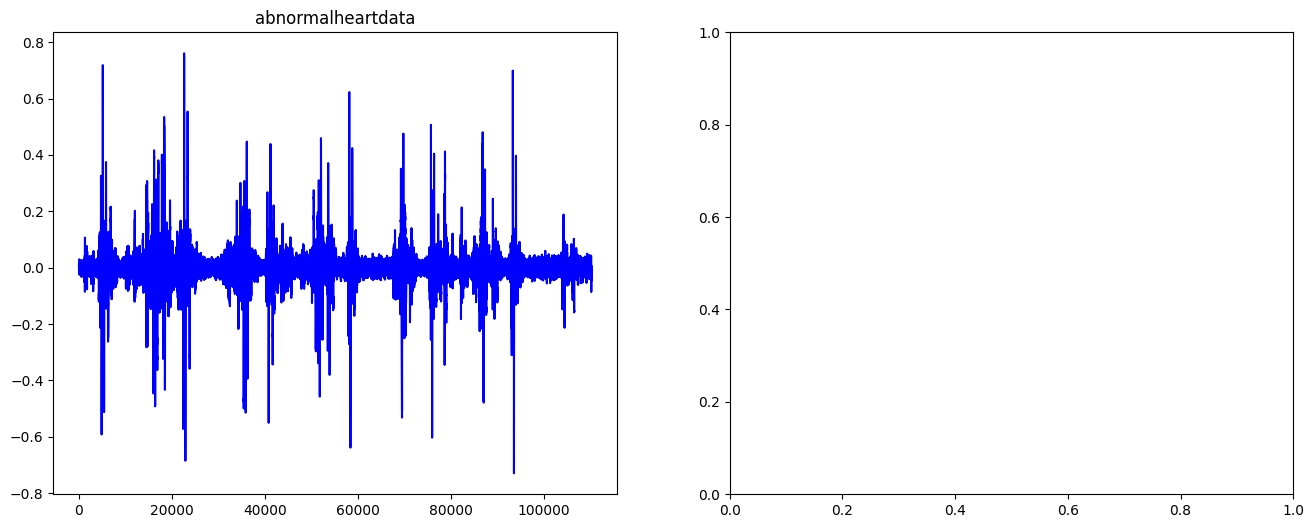

In [ ]:
fig ,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
axes[0].plot(Noiseabnormalheartdata[1],color='b')
axes[0].set_title("abnormalheartdata")


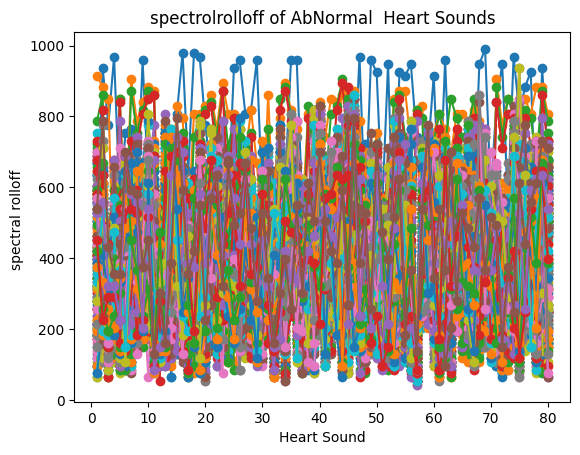

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(NoiseabnormalRolloff)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, NoiseabnormalRolloff, marker='o')

# Customize the plot
plt.title("spectrolrolloff of AbNormal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff ")

# Display the plot
plt.show()

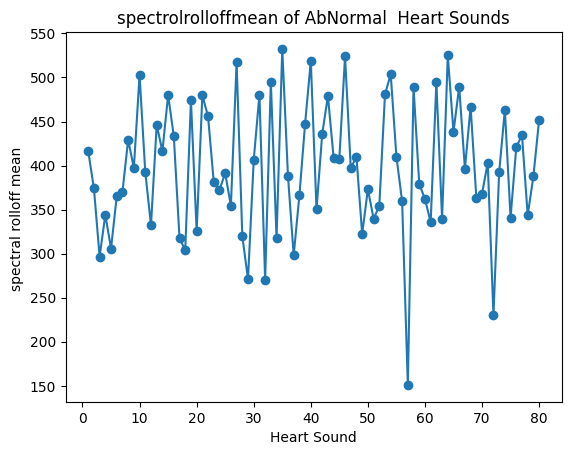

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(abnormalRolloffmean)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, abnormalRolloffmean, marker='o')

# Customize the plot
plt.title("spectrolrolloffmean of AbNormal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff mean ")

# Display the plot
plt.show()

In [ ]:
data_dir1 = "/content/normaldata"
audio_files = glob(data_dir1+'/*.wav')
len(audio_files)

34

In [ ]:
len(audio_files)
Noisenormalheartdata=[]
Noisenormaltimedata=[]
NoisenormalRolloff=[]
normalRolloffmean=[]
for file in range(0, len(audio_files),1):
    audio, sfreq = lr.load(audio_files[file],duration=5)
    audio_n = audio + 0.009*np.random.normal(0,1,len(audio))
    # Approximate maximum frequencies with roll_percent=0.85 (default)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sfreq)[0]
    rolloffmean=np.mean(rolloff)
    Noisenormalheartdata.append(audio_n)
    Noisenormaltimedata.append(sfreq)
    NoisenormalRolloff.append(rolloff)
    normalRolloffmean.append(rolloffmean)

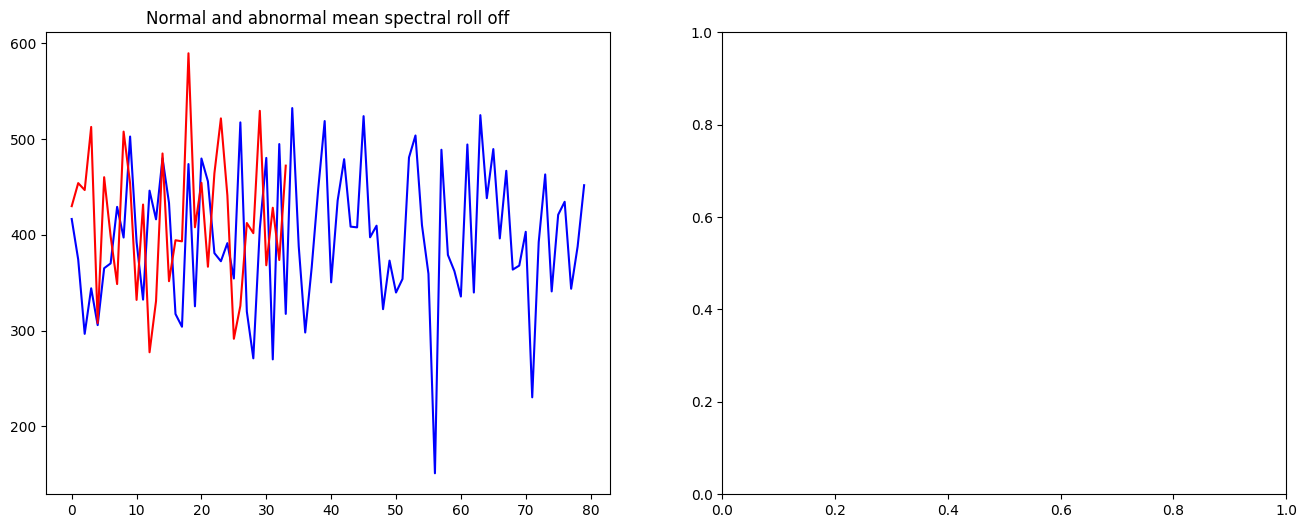

In [ ]:
fig ,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
axes[0].plot(abnormalRolloffmean,color='b')
axes[0].set_title("Normal and abnormal mean spectral roll off")
axes[0].plot(normalRolloffmean,color='r')

In [ ]:
normalmeandf = pd.DataFrame(normalRolloffmean)
normalmeandf

,0
0,429.966227
1,454.041545
2,446.813965
3,512.709554
4,307.944743
5,460.222371
6,398.613485
7,348.618571
8,507.824707
9,453.842163


Text(0.5, 1.0, 'abnormalheartdata ')

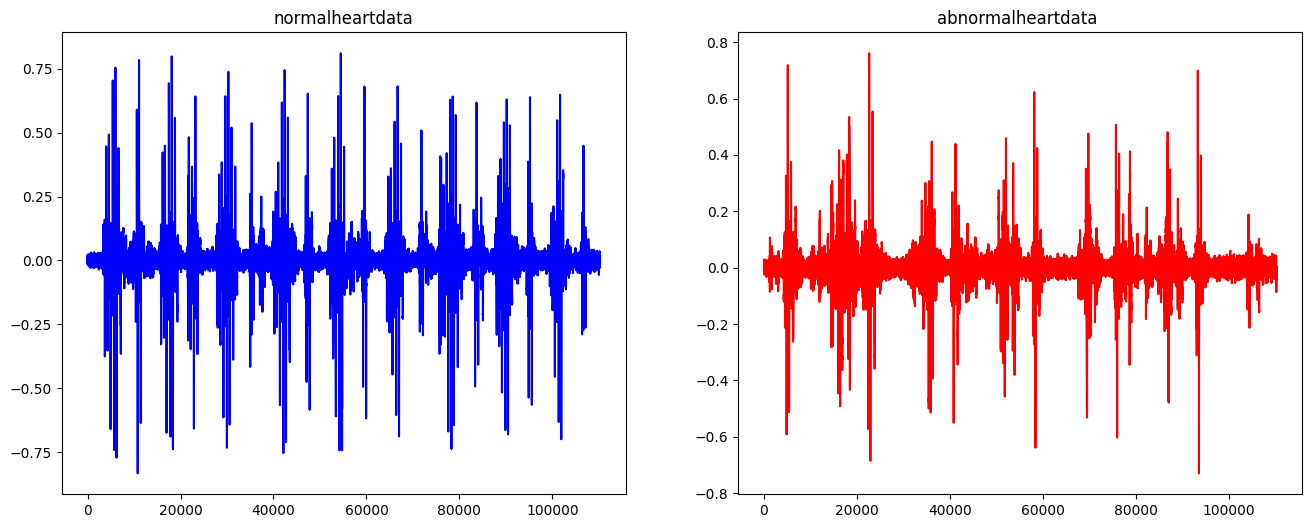

In [ ]:
fig ,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
axes[0].plot(Noisenormalheartdata[1],color='b')
axes[0].set_title("normalheartdata")
axes[1].plot(Noiseabnormalheartdata[1],color='r')
axes[1].set_title("abnormalheartdata ")

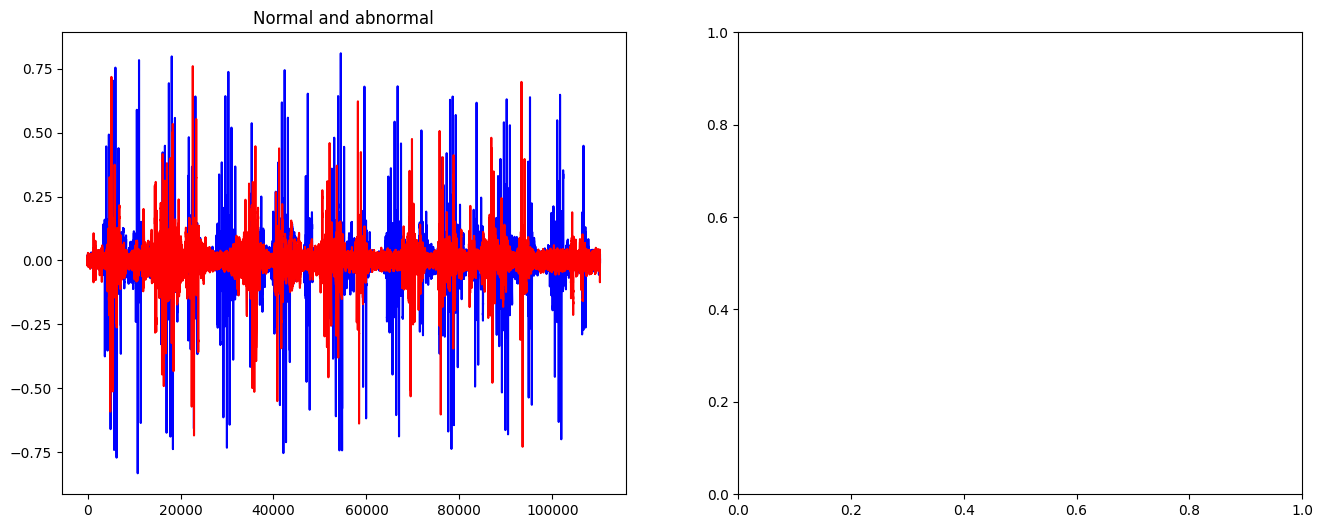

In [ ]:
fig ,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
axes[0].plot(Noisenormalheartdata[1],color='b')
axes[0].set_title("Normal and abnormal")
axes[0].plot(Noiseabnormalheartdata[1],color='r')


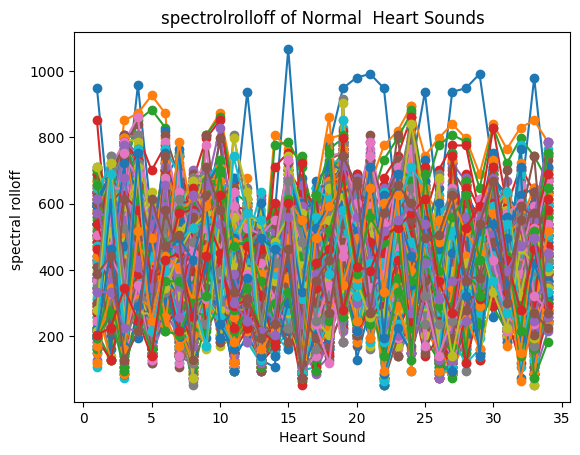

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(NoisenormalRolloff)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, NoisenormalRolloff, marker='o')

# Customize the plot
plt.title("spectrolrolloff of Normal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff ")

# Display the plot
plt.show()

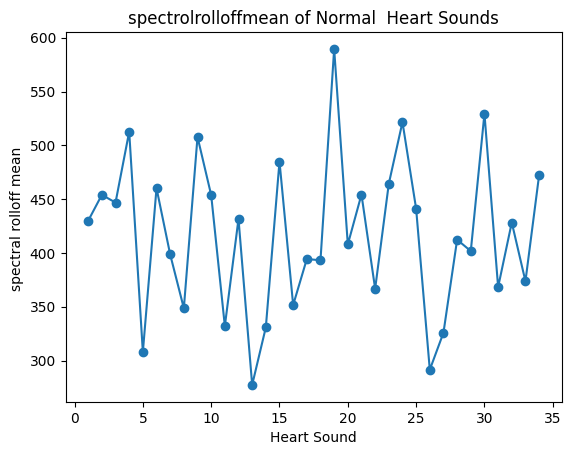

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(normalRolloffmean)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, normalRolloffmean, marker='o')

# Customize the plot
plt.title("spectrolrolloffmean of Normal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff mean ")

# Display the plot
plt.show()

In [ ]:

axes.plot(Noisenormalheartdata[1],color='b')
axes.set_title("normalheartdata")
axes.plot(Noiseabnormalheartdata[1],color='r')


AttributeError: ignored

In [ ]:
normaldf = pd.DataFrame(NoisenormalRolloff)
normaldf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,947.460938,710.595703,667.529297,635.229492,516.796875,592.163086,581.396484,538.330078,387.597656,441.430664,...,366.064453,344.531250,279.931641,204.565430,193.798828,118.432617,193.798828,204.565430,333.764648,387.597656
1,527.563477,516.796875,462.963867,441.430664,366.064453,312.231445,398.364258,409.130859,409.130859,506.030273,...,441.430664,742.895508,721.362305,689.062500,462.963867,344.531250,269.165039,226.098633,333.764648,441.430664
2,581.396484,850.561523,699.829102,538.330078,409.130859,355.297852,290.698242,204.565430,430.664062,645.996094,...,355.297852,333.764648,247.631836,215.332031,172.265625,161.499023,96.899414,344.531250,226.098633,129.199219
3,958.227539,872.094727,850.561523,807.495117,742.895508,710.595703,645.996094,592.163086,699.829102,753.662109,...,689.062500,721.362305,710.595703,764.428711,753.662109,516.796875,258.398438,247.631836,215.332031,215.332031
4,549.096680,925.927734,882.861328,699.829102,118.432617,118.432617,139.965820,129.199219,139.965820,139.965820,...,236.865234,215.332031,215.332031,215.332031,247.631836,247.631836,161.499023,139.965820,581.396484,613.696289
5,678.295898,872.094727,829.028320,775.195312,624.462891,581.396484,581.396484,506.030273,430.664062,495.263672,...,387.597656,333.764648,344.531250,398.364258,441.430664,441.430664,366.064453,430.664062,473.730469,473.730469
6,742.895508,452.197266,312.231445,215.332031,139.965820,183.032227,258.398438,279.931641,301.464844,279.931641,...,452.197266,462.963867,452.197266,484.497070,495.263672,409.130859,366.064453,452.197266,462.963867,506.030273
7,549.096680,495.263672,495.263672,667.529297,678.295898,645.996094,645.996094,667.529297,656.762695,656.762695,...,452.197266,484.497070,527.563477,527.563477,430.664062,312.231445,301.464844,258.398438,172.265625,129.199219
8,581.396484,807.495117,807.495117,796.728516,645.996094,549.096680,635.229492,699.829102,689.062500,656.762695,...,527.563477,570.629883,570.629883,549.096680,592.163086,592.163086,322.998047,441.430664,699.829102,710.595703
9,785.961914,872.094727,861.328125,850.561523,829.028320,796.728516,506.030273,193.798828,172.265625,247.631836,...,290.698242,301.464844,279.931641,258.398438,236.865234,667.529297,699.829102,624.462891,538.330078,581.396484


In [ ]:
normaldf["label"]="1"
normaldf



,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,947.460938,710.595703,667.529297,635.229492,516.796875,592.163086,581.396484,538.330078,387.597656,441.430664,...,344.531250,279.931641,204.565430,193.798828,118.432617,193.798828,204.565430,333.764648,387.597656,1
1,527.563477,516.796875,462.963867,441.430664,366.064453,312.231445,398.364258,409.130859,409.130859,506.030273,...,742.895508,721.362305,689.062500,462.963867,344.531250,269.165039,226.098633,333.764648,441.430664,1
2,581.396484,850.561523,699.829102,538.330078,409.130859,355.297852,290.698242,204.565430,430.664062,645.996094,...,333.764648,247.631836,215.332031,172.265625,161.499023,96.899414,344.531250,226.098633,129.199219,1
3,958.227539,872.094727,850.561523,807.495117,742.895508,710.595703,645.996094,592.163086,699.829102,753.662109,...,721.362305,710.595703,764.428711,753.662109,516.796875,258.398438,247.631836,215.332031,215.332031,1
4,549.096680,925.927734,882.861328,699.829102,118.432617,118.432617,139.965820,129.199219,139.965820,139.965820,...,215.332031,215.332031,215.332031,247.631836,247.631836,161.499023,139.965820,581.396484,613.696289,1
5,678.295898,872.094727,829.028320,775.195312,624.462891,581.396484,581.396484,506.030273,430.664062,495.263672,...,333.764648,344.531250,398.364258,441.430664,441.430664,366.064453,430.664062,473.730469,473.730469,1
6,742.895508,452.197266,312.231445,215.332031,139.965820,183.032227,258.398438,279.931641,301.464844,279.931641,...,462.963867,452.197266,484.497070,495.263672,409.130859,366.064453,452.197266,462.963867,506.030273,1
7,549.096680,495.263672,495.263672,667.529297,678.295898,645.996094,645.996094,667.529297,656.762695,656.762695,...,484.497070,527.563477,527.563477,430.664062,312.231445,301.464844,258.398438,172.265625,129.199219,1
8,581.396484,807.495117,807.495117,796.728516,645.996094,549.096680,635.229492,699.829102,689.062500,656.762695,...,570.629883,570.629883,549.096680,592.163086,592.163086,322.998047,441.430664,699.829102,710.595703,1
9,785.961914,872.094727,861.328125,850.561523,829.028320,796.728516,506.030273,193.798828,172.265625,247.631836,...,301.464844,279.931641,258.398438,236.865234,667.529297,699.829102,624.462891,538.330078,581.396484,1


In [ ]:
normalmeandf["label"]="1"

normalmeandf

,0,label
0,429.966227,1
1,454.041545,1
2,446.813965,1
3,512.709554,1
4,307.944743,1
5,460.222371,1
6,398.613485,1
7,348.618571,1
8,507.824707,1
9,453.842163,1


In [ ]:
newdf1 = pd.concat([abnormaldf, normaldf])
newdf1

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,441.430664,915.161133,785.961914,279.931641,226.098633,215.332031,581.396484,667.529297,732.128906,753.662109,...,452.197266,279.931641,355.297852,387.597656,376.831055,419.897461,452.197266,527.563477,538.330078,-1
1,936.694336,882.861328,861.328125,818.261719,656.762695,613.696289,559.863281,419.897461,452.197266,570.629883,...,516.796875,516.796875,527.563477,409.130859,333.764648,258.398438,226.098633,559.863281,785.961914,-1
2,775.195312,850.561523,204.565430,301.464844,344.531250,333.764648,247.631836,183.032227,183.032227,236.865234,...,409.130859,387.597656,344.531250,301.464844,258.398438,193.798828,290.698242,322.998047,430.664062,-1
3,968.994141,290.698242,312.231445,409.130859,441.430664,419.897461,409.130859,419.897461,430.664062,398.364258,...,312.231445,258.398438,258.398438,183.032227,204.565430,236.865234,290.698242,322.998047,355.297852,-1
4,559.863281,850.561523,850.561523,839.794922,785.961914,667.529297,710.595703,559.863281,506.030273,387.597656,...,376.831055,376.831055,366.064453,333.764648,344.531250,301.464844,226.098633,226.098633,355.297852,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,699.829102,839.794922,829.028320,829.028320,699.829102,613.696289,602.929688,570.629883,559.863281,441.430664,...,344.531250,333.764648,366.064453,538.330078,678.295898,710.595703,710.595703,678.295898,667.529297,1
30,581.396484,764.428711,721.362305,592.163086,355.297852,355.297852,322.998047,279.931641,215.332031,247.631836,...,236.865234,226.098633,269.165039,355.297852,441.430664,441.430664,430.664062,398.364258,301.464844,1
31,602.929688,829.028320,796.728516,710.595703,387.597656,441.430664,473.730469,430.664062,322.998047,279.931641,...,559.863281,462.963867,236.865234,193.798828,150.732422,215.332031,279.931641,473.730469,549.096680,1
32,979.760742,850.561523,742.895508,635.229492,559.863281,570.629883,527.563477,527.563477,538.330078,495.263672,...,398.364258,419.897461,409.130859,419.897461,516.796875,516.796875,462.963867,495.263672,742.895508,1


In [ ]:
X = newdf1.drop(['label'], axis=1).values
y = newdf1['label'].values

In [ ]:
X

array([[538.33007812, 818.26171875, 850.56152344, ..., 376.83105469,
        366.06445312, 430.6640625 ],
       [441.43066406, 915.16113281, 785.96191406, ..., 452.19726562,
        527.56347656, 538.33007812],
       [764.42871094, 904.39453125, 872.09472656, ..., 538.33007812,
        581.39648438, 592.16308594],
       ...,
       [742.89550781, 452.19726562, 312.23144531, ..., 452.19726562,
        462.96386719, 506.03027344],
       [527.56347656, 516.796875  , 462.96386719, ..., 226.09863281,
        333.76464844, 441.43066406],
       [581.39648438, 764.42871094, 721.36230469, ..., 430.6640625 ,
        398.36425781, 301.46484375]])

In [ ]:
y

array(['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',
       '-1', '-1', '-1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
print("testAccuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import precision_recall_fscore_support
# Calculate precision, recall, and F1-score with macro-averaging
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

testAccuracy: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
fscore

0.4328703703703704

In [ ]:
recall

0.46212121212121215

In [ ]:
precision

0.43333333333333335

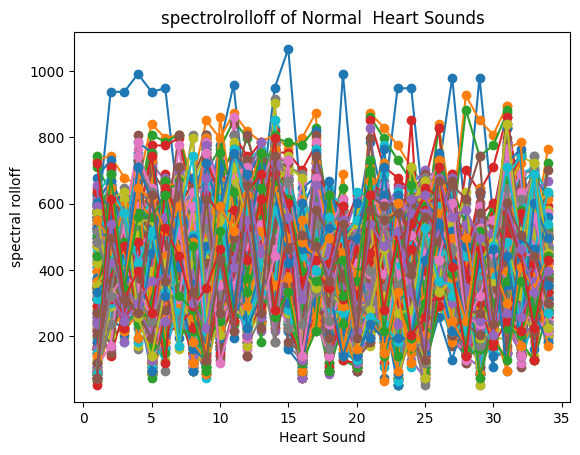

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(NoisenormalRolloff)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, NoisenormalRolloff, marker='o')

# Customize the plot
plt.title("spectrolrolloff of Normal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff")

# Display the plot
plt.show()


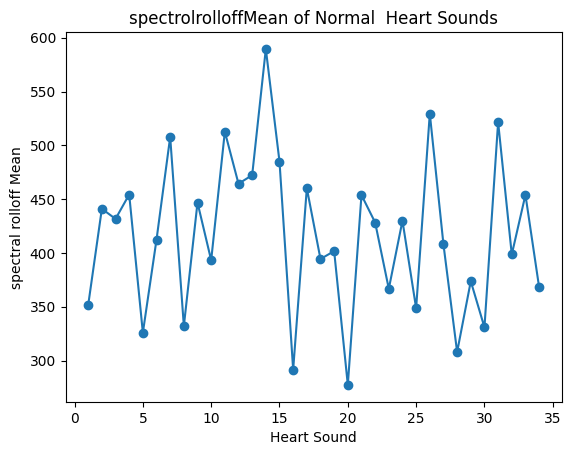

In [ ]:
# Assuming abnormalvar is a list containing variance values for each heart sound
x = range(1, len(normalRolloffmean)+1)  # x-axis values (heart sound numbers)

# Plot the variance values
plt.plot(x, normalRolloffmean, marker='o')

# Customize the plot
plt.title("spectrolrolloffMean of Normal  Heart Sounds")
plt.xlabel("Heart Sound")
plt.ylabel("spectral rolloff Mean")

# Display the plot
plt.show()

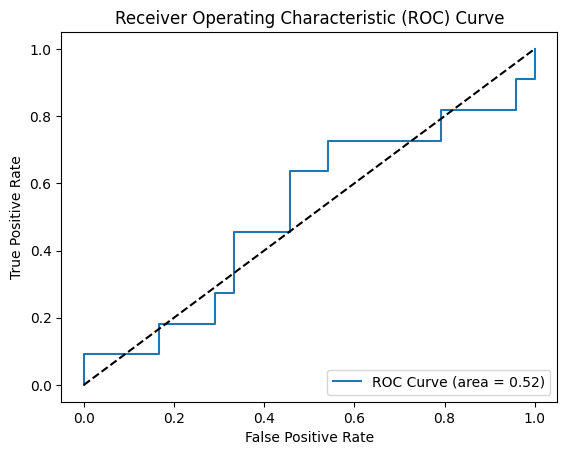

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map the values in y_test1 using np.where()
y_test = np.where(y_test == '-1', -1, 1)

y_pred = logreg.predict(X_test)
lr_probs= logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label=1)  # Specify pos_label=1 for binary classification
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
newdf2 = pd.concat([abnormalmeandf, normalmeandf])
newdf2

,0,label
0,396.270752,-1
1,416.557821,-1
2,370.201619,-1
3,489.581299,-1
4,339.795939,-1
...,...,...
29,330.873617,1
30,521.631877,1
31,398.613485,1
32,454.041545,1


In [ ]:
X1 = newdf2.drop(['label'], axis=1).values
y1 = newdf2['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.30, random_state=0)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)
y_pred1=logreg.predict(X_test1)
# import the metrics class
from sklearn import metrics
print("testAccuracy:",metrics.accuracy_score(y_test1, y_pred1))
from sklearn.metrics import precision_recall_fscore_support
# Calculate precision, recall, and F1-score with macro-averaging
precision1, recall1, fscore1, _ = precision_recall_fscore_support(y_test1, y_pred1, average='macro')

testAccuracy: 0.6857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
precision1

0.34285714285714286

In [ ]:
recall1

0.5

In [ ]:
fscore1

0.4067796610169492

In [ ]:
lr_probs1 = logreg.predict_proba(X_test1)[:, 1]
len(lr_probs1)

35

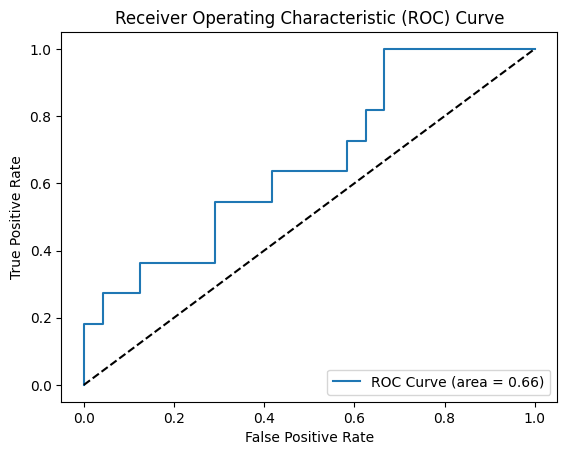

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map the values in y_test1 using np.where()
y_test1 = np.where(y_test1 == '-1', -1, 1)

y_pred1 = logreg.predict(X_test1)
lr_probs1= logreg.predict_proba(X_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, lr_probs1, pos_label=1)  # Specify pos_label=1 for binary classification
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

seed = 100
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
# Convert X_res and y_res into DataFrames
X_res_df = pd.DataFrame(X_res)  # No need to specify column names for X_res
y_res_df = pd.DataFrame(y_res, columns=['label'])  # Assuming y is a Series
# Combine X_res_df and y_res_df into a single DataFrame
balanced = pd.concat([X_res_df, y_res_df], axis=1)


In [ ]:
balanced

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,538.330078,818.261719,850.561523,796.728516,775.195312,387.597656,172.265625,430.664062,473.730469,506.030273,...,96.899414,107.666016,279.931641,139.965820,269.165039,301.464844,376.831055,366.064453,430.664062,-1
1,441.430664,915.161133,785.961914,279.931641,226.098633,215.332031,581.396484,667.529297,732.128906,753.662109,...,452.197266,279.931641,355.297852,387.597656,376.831055,419.897461,452.197266,527.563477,538.330078,-1
2,764.428711,904.394531,872.094727,732.128906,602.929688,689.062500,656.762695,484.497070,204.565430,236.865234,...,473.730469,495.263672,516.796875,538.330078,506.030273,452.197266,538.330078,581.396484,592.163086,-1
3,667.529297,785.961914,764.428711,764.428711,732.128906,656.762695,656.762695,785.961914,775.195312,764.428711,...,183.032227,226.098633,247.631836,258.398438,387.597656,322.998047,430.664062,484.497070,484.497070,-1
4,538.330078,689.062500,850.561523,570.629883,430.664062,301.464844,107.666016,86.132812,129.199219,570.629883,...,387.597656,430.664062,441.430664,527.563477,462.963867,312.231445,322.998047,506.030273,699.829102,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,604.437486,824.252210,820.062936,809.296335,669.037096,570.043045,635.229492,683.072009,674.400044,646.289513,...,622.995797,622.995797,580.516228,495.809805,495.809805,285.294589,466.566303,678.882736,689.649338,1
156,531.144781,677.149436,679.045081,584.228606,381.746117,326.204760,386.473883,361.921262,299.966479,316.397325,...,308.275550,300.153775,340.575355,397.615076,454.654797,433.496185,428.019236,395.719431,317.333803,1
157,818.721179,829.682937,797.383132,754.971343,349.865762,177.697715,153.448467,220.666543,497.032365,479.524440,...,301.562422,247.826993,503.314228,566.507026,492.352470,445.260786,242.199746,315.504529,503.119072,1
158,555.923100,850.837111,814.597125,706.655522,227.655343,193.523241,167.271502,149.678480,174.097922,153.618661,...,345.034018,385.992540,379.166119,384.160243,233.978995,181.978284,167.271502,342.471772,374.771577,1


In [ ]:
balanced

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,538.330078,818.261719,850.561523,796.728516,775.195312,387.597656,172.265625,430.664062,473.730469,506.030273,...,96.899414,107.666016,279.931641,139.965820,269.165039,301.464844,376.831055,366.064453,430.664062,-1
1,441.430664,915.161133,785.961914,279.931641,226.098633,215.332031,581.396484,667.529297,732.128906,753.662109,...,452.197266,279.931641,355.297852,387.597656,376.831055,419.897461,452.197266,527.563477,538.330078,-1
2,764.428711,904.394531,872.094727,732.128906,602.929688,689.062500,656.762695,484.497070,204.565430,236.865234,...,473.730469,495.263672,516.796875,538.330078,506.030273,452.197266,538.330078,581.396484,592.163086,-1
3,667.529297,785.961914,764.428711,764.428711,732.128906,656.762695,656.762695,785.961914,775.195312,764.428711,...,183.032227,226.098633,247.631836,258.398438,387.597656,322.998047,430.664062,484.497070,484.497070,-1
4,538.330078,689.062500,850.561523,570.629883,430.664062,301.464844,107.666016,86.132812,129.199219,570.629883,...,387.597656,430.664062,441.430664,527.563477,462.963867,312.231445,322.998047,506.030273,699.829102,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,604.437486,824.252210,820.062936,809.296335,669.037096,570.043045,635.229492,683.072009,674.400044,646.289513,...,622.995797,622.995797,580.516228,495.809805,495.809805,285.294589,466.566303,678.882736,689.649338,1
156,531.144781,677.149436,679.045081,584.228606,381.746117,326.204760,386.473883,361.921262,299.966479,316.397325,...,308.275550,300.153775,340.575355,397.615076,454.654797,433.496185,428.019236,395.719431,317.333803,1
157,818.721179,829.682937,797.383132,754.971343,349.865762,177.697715,153.448467,220.666543,497.032365,479.524440,...,301.562422,247.826993,503.314228,566.507026,492.352470,445.260786,242.199746,315.504529,503.119072,1
158,555.923100,850.837111,814.597125,706.655522,227.655343,193.523241,167.271502,149.678480,174.097922,153.618661,...,345.034018,385.992540,379.166119,384.160243,233.978995,181.978284,167.271502,342.471772,374.771577,1


<Axes: xlabel='label', ylabel='count'>

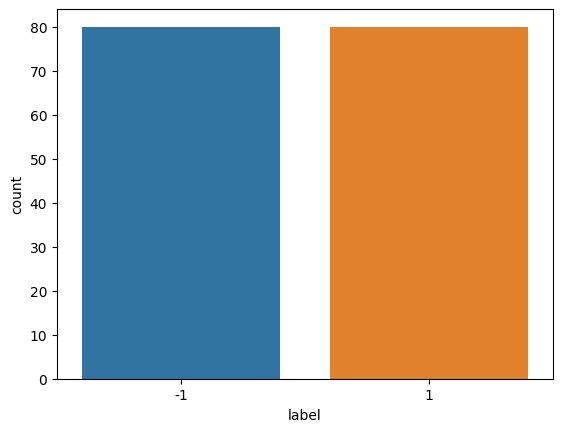

In [ ]:

import seaborn as sns
sns.countplot(x = 'label', data = balanced)

In [ ]:
newy=balanced.label

newX1=balanced.drop(['label'], axis = 1)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( newX1, newy, test_size=0.30, random_state=46)

logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)
y_pred1=logreg.predict(X_test1)
print("testAccuracy:",metrics.accuracy_score(y_test1, y_pred1))

from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test1,y_pred1, average='macro')

testAccuracy: 0.7916666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7895652173913044, 0.7936507936507937, 0.7902097902097902, None)

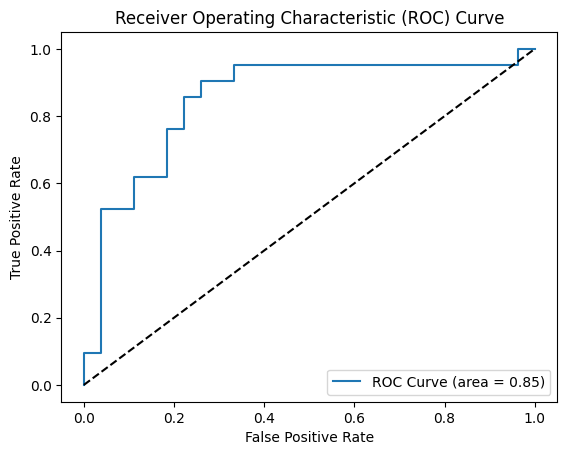

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_test1 = y_test1.map({'-1': -1, '1': 1})
y_pred1 = logreg.predict(X_test1)
lr_probs = logreg.predict_proba(X_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

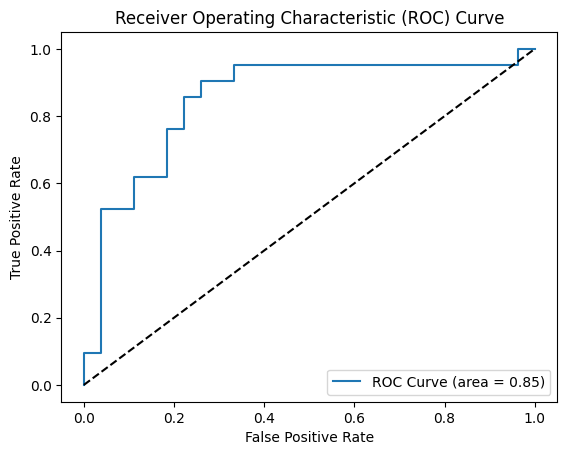

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_test2 = y_test2.map({'-1': -1, '1': 1})
y_pred2 = logreg.predict(X_test2)
lr_probs2 = logreg.predict_proba(X_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, lr_probs2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()